In [163]:
# importing the libraries

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [165]:
# extracting and reading the dataset

df_ad= pd.read_csv("application_data.csv")
df_pa= pd.read_csv("previous_application.csv")
df_columns= pd.read_csv("columns_description.csv", encoding='ISO-8859-1')

# 1. Checking the data files


In [166]:
df_ad.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
df_ad.shape

(307511, 122)

In [168]:
df_ad.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [169]:
df_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [170]:
df_pa.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
df_pa.shape

(1670214, 37)

In [172]:
df_pa.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [173]:
df_pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

# 2. Analysis of the application dataset


### 2.1 Cleaning the missing data.
### Listing the columns with more than 30% null values.
      

In [174]:
col_null= df_ad.isnull().sum()
col_null= col_null[col_null.values>(0.3*len(col_null))]
len(col_null)


64

In [175]:
# Deleting or removing the columns with more than 30% null values 


In [176]:
col_null= list(col_null[col_null.values>=0.3].index)
df_ad.drop(labels= col_null, axis= 1, inplace= True)
print(len(col_null))

64


In [177]:
# Imputation of values in columns with null values less than 30%
# Calculating the percentage of null values in the remaining columns


In [178]:
df_ad.isnull().sum()/len(df_ad)*100



SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


Checking the columns with null values less than or equal to 13%

In [179]:
list(df_ad.columns[(df_ad.isnull().mean()<=0.13) & (df_ad.isnull().mean()>0)])

['AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE']

So,'AMT_ANNUITY', 'CNT_FAM_MEMBERS', and 'DAYS_LAST_PHONE_CHANGE' are the columns with less null values, therefore we can impute the missing values.


### Checking for the values to be imputed into these columns.


#### 'AMT_ANNUITY' Imputation 


In [180]:
df_ad['AMT_ANNUITY'].value_counts()

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

 Since 'AMT_ANNUITY' is a continuous variable we have to check for outliers.

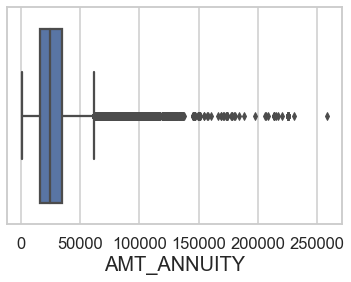

In [181]:
sns.boxplot(df_ad['AMT_ANNUITY'])
plt.show()

We can see from the above boxplot that the 'AMT_ANNUITY' column has large number of outliers so we cannot take the mean value to impute in the missing values. We can use the Median value.

In [182]:
im_values= df_ad['AMT_ANNUITY'].median()
df_ad.loc[df_ad['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']= im_values


In [183]:
list(df_ad.columns[(df_ad.isnull().mean()<=0.13) & (df_ad.isnull().mean()>0)])

['CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE']

This confirms that all the null values in the 'AMT_ANNUITY' column have been imputed.

#### 'CNT_FAM_MEMBERS' IMPUTATION

This column is a count of family members, so its a continuous variable. Therefore, we can impute the missing values with mean or median of this column values.

#### Checking for outliers

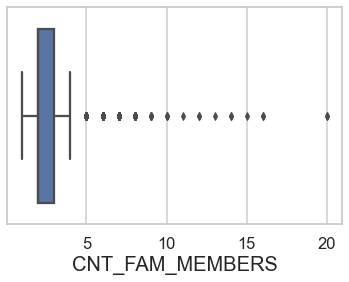

In [184]:
sns.boxplot(df_ad['CNT_FAM_MEMBERS'])
plt.show()

As this column has outliers we have to impute median into the missing values.

In [185]:
im_values = df_ad['CNT_FAM_MEMBERS'].median()
df_ad.loc[df_ad['CNT_FAM_MEMBERS'].isnull(),'CNT_FAM_MEMBERS']= im_values

In [186]:
list(df_ad.columns[(df_ad.isnull().mean()<=0.13) & (df_ad.isnull().mean()>0)])

['DAYS_LAST_PHONE_CHANGE']

This confirms that all the null values in 'CNT_FAM_MEMBERS'column are imputed with the median.

#### 'DAYS_LAST_PHONE_CHANGE' IMPUTATION

In [187]:
im_values= df_ad['DAYS_LAST_PHONE_CHANGE'].mode()
df_ad.loc[df_ad['DAYS_LAST_PHONE_CHANGE'].isnull(),'DAYS_LAST_PHONE_CHANGE']= im_values

In [188]:
list(df_ad.columns[(df_ad.isnull().mean()<=0.13) & (df_ad.isnull().mean()>0)])

['DAYS_LAST_PHONE_CHANGE']

In [189]:
print(type(df_ad.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

In [190]:
df_ad.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

Now all the columns have zero null values.

In [191]:
## Making Gender more easy to understand.
df_ad['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Since the maximum number of rows is of females, and there are only 4 rows with XNA, we can replace it with Gender 'F' as it is already in majority thereby bringing no impact on the dataset. 

In [192]:
df_ad.loc[df_ad['CODE_GENDER']== 'XNA', 'CODE_GENDER']= 'F'
df_ad['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

### Binning variables for analysis

Creating bins for continuous varaiable categorical columns 'AMT_INCOME_TOTAL','DAYS_BIRTH' and 'AMT_CREDIT'

In [193]:
## Creating bins for Total income amount

df_ad['AMT_INCOME_TOTAL'].quantile([0,0.1,0.3,0.6,0.8,1])

0.0        25650.0
0.1        81000.0
0.3       112500.0
0.6       162000.0
0.8       225000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [194]:
## Creating a new categorical variable based on total income amount

df_ad['INCOME_RANGE']= pd.qcut(df_ad['AMT_INCOME_TOTAL'],q= [0,0.1,0.3,0.6,0.8,1], labels= ['VeryLow','Low','Medium','High','VeryHigh'])
df_ad['INCOME_RANGE']

0             High
1         VeryHigh
2          VeryLow
3           Medium
4           Medium
            ...   
307506      Medium
307507     VeryLow
307508      Medium
307509        High
307510      Medium
Name: INCOME_RANGE, Length: 307511, dtype: category
Categories (5, object): ['VeryLow' < 'Low' < 'Medium' < 'High' < 'VeryHigh']

In [195]:
## Creating bins for 'DAYS_BIRTH'

abs(df_ad['DAYS_BIRTH']).quantile([0,0.1,0.3,0.6,0.8,1])

0.0     7489.0
0.1    10284.0
0.3    13140.0
0.6    17220.0
0.8    20474.0
1.0    25229.0
Name: DAYS_BIRTH, dtype: float64

In [196]:
## Creating a column "AGE" using column 'DAYS_BIRTH'

df_ad['AGE']= abs(df_ad['DAYS_BIRTH'])//365.25
df_ad['AGE'].describe()

count    307511.000000
mean         43.405137
std          11.945779
min          20.000000
25%          33.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

In [197]:
## The age in the AGE column varies from 20 to 69, therefore we can create bins of 5 years starting from 20 to 70

df_ad['AGE_GROUP']= pd.cut(df_ad['AGE'], bins= np.arange(20,71,5))
df_ad['AGE_GROUP']

0         (20, 25]
1         (40, 45]
2         (50, 55]
3         (50, 55]
4         (50, 55]
            ...   
307506    (20, 25]
307507    (55, 60]
307508    (35, 40]
307509    (30, 35]
307510    (45, 50]
Name: AGE_GROUP, Length: 307511, dtype: category
Categories (10, interval[int64, right]): [(20, 25] < (25, 30] < (30, 35] < (35, 40] ... (50, 55] < (55, 60] < (60, 65] < (65, 70]]

In [198]:
df_ad['CREDIT_INCOME_RATIO']= round((df_ad['AMT_CREDIT']/df_ad['AMT_INCOME_TOTAL']))
df_ad['CREDIT_INCOME_RATIO']

0         2.0
1         5.0
2         2.0
3         2.0
4         4.0
         ... 
307506    2.0
307507    4.0
307508    4.0
307509    2.0
307510    4.0
Name: CREDIT_INCOME_RATIO, Length: 307511, dtype: float64

#### Converting all negative values to absolute values

In [199]:
df_ad['DAYS_BIRTH']= abs(df_ad['DAYS_BIRTH'])
df_ad['DAYS_ID_PUBLISH']= abs(df_ad['DAYS_ID_PUBLISH'])
df_ad['DAYS_LAST_PHONE_CHANGE']= abs(df_ad['DAYS_LAST_PHONE_CHANGE'])

In [200]:
display(df_ad.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,INCOME_RANGE,AGE,AGE_GROUP,CREDIT_INCOME_RATIO
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,High,25.0,"(20, 25]",2.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,VeryHigh,45.0,"(40, 45]",5.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,VeryLow,52.0,"(50, 55]",2.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,Medium,52.0,"(50, 55]",2.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,Medium,54.0,"(50, 55]",4.0


## Checking for imbalances

In [201]:
## calculating imbalance percentage of 'TARGET' column

df_ad['TARGET'].value_counts(normalize= True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

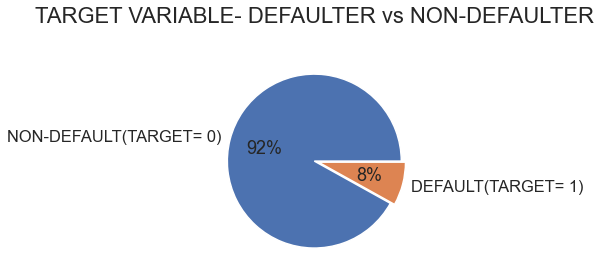

In [202]:
plt.pie(df_ad['TARGET'].value_counts(normalize= True)*100, labels= ['NON-DEFAULT(TARGET= 0)','DEFAULT(TARGET= 1)'], explode= (0,0.05), autopct= '%1.f%%')
plt.title('TARGET VARIABLE- DEFAULTER vs NON-DEFAULTER')
plt.show()

There is clearly an imbalance between people who defaulted (only 8%) and people who didn't default(about 92%).

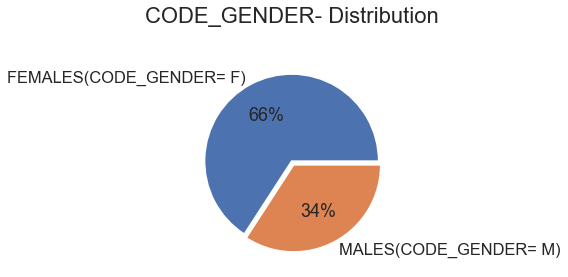

In [203]:
## calculating the imbalance percentage of GENDER type

plt.pie(df_ad['CODE_GENDER'].value_counts(normalize= True)*100, labels= ['FEMALES(CODE_GENDER= F)','MALES(CODE_GENDER= M)'], explode= (0,0.05),autopct= '%1.f%%')
plt.title('CODE_GENDER- Distribution')
plt.show()

In [204]:
## Lets select the remaining columns needed for further analysis.

Analysis_columns= ['TARGET','CODE_GENDER','FLAG_OWN_CAR','SK_ID_CURR','FLAG_OWN_REALTY','INCOME_RANGE','AGE_GROUP','AMT_CREDIT','AMT_INCOME_TOTAL','CREDIT_INCOME_RATIO','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_EMPLOYED','DAYS_REGISTRATION','FLAG_EMAIL','ORGANIZATION_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY','AMT_ANNUITY','REGION_RATING_CLIENT','NAME_CONTRACT_TYPE']
df_ad_analysis= df_ad[Analysis_columns]
df_ad_analysis.shape


(307511, 23)

### Splitting the dataframe into dataframe related to defaulters and dataframe related to non-defaulters.

In [205]:
df_ad0= df_ad_analysis[df_ad_analysis.TARGET== 0]           # non-defaulters dataframe
df_ad1= df_ad_analysis[df_ad_analysis.TARGET== 1]           # defaulters dataframe


### UNIVARIATE ANALYSIS

In [206]:
## Function to plot the univariate categorical variable

def plotunidf_ad(var):
    
    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2)= plt.subplots(1,2,figsize=(20,6))
    
    sns.countplot(x=var, data= df_ad0, ax=ax1)
    ax1.set_ylabel('TOTAL_COUNTS')
    ax1.set_title(f'Distribution of {var} for Non-Defaulters', fontsize= 20)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, ha= "right")
    
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(df_ad0))*100),(p.get_x()+0.1,p.get_height()+50))
                  
    sns.countplot(x=var, data= df_ad1, ax=ax2)
    ax2.set_ylabel('TOTAL_COUNTS')
    ax2.set_title(f'Distribution of {var} for Defaulters', fontsize= 20)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 45, ha= "right")
    
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(df_ad1))*100),(p.get_x()+0.1,p.get_height()+50))
    plt.show()

### Univariate categorical analysis 



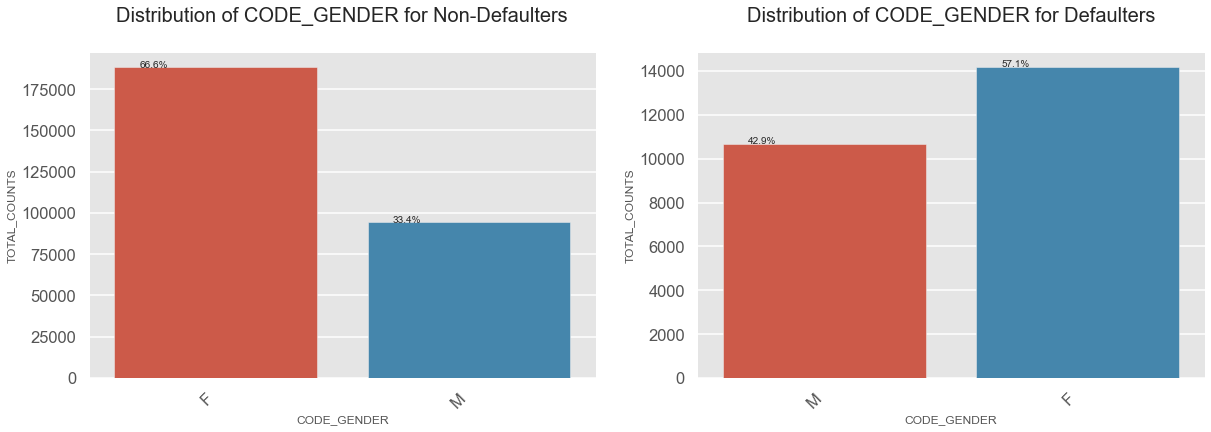

In [207]:
plotunidf_ad('CODE_GENDER')

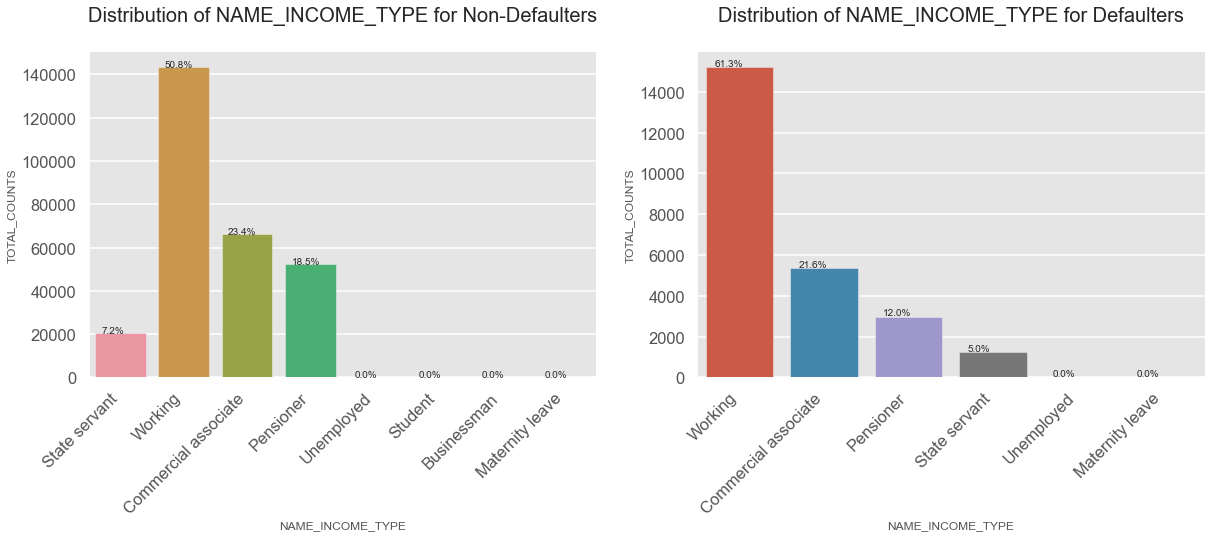

In [208]:
plotunidf_ad('NAME_INCOME_TYPE')

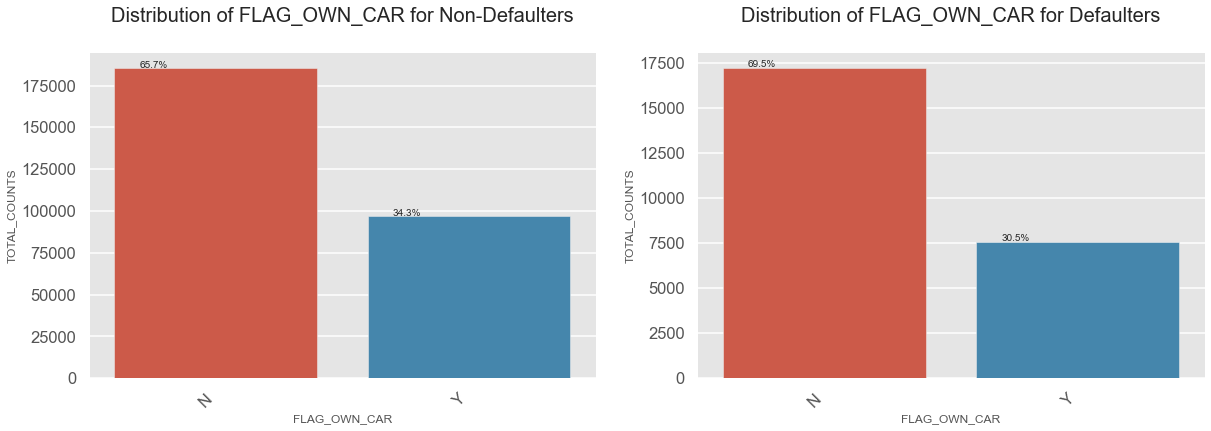

In [209]:
plotunidf_ad('FLAG_OWN_CAR')

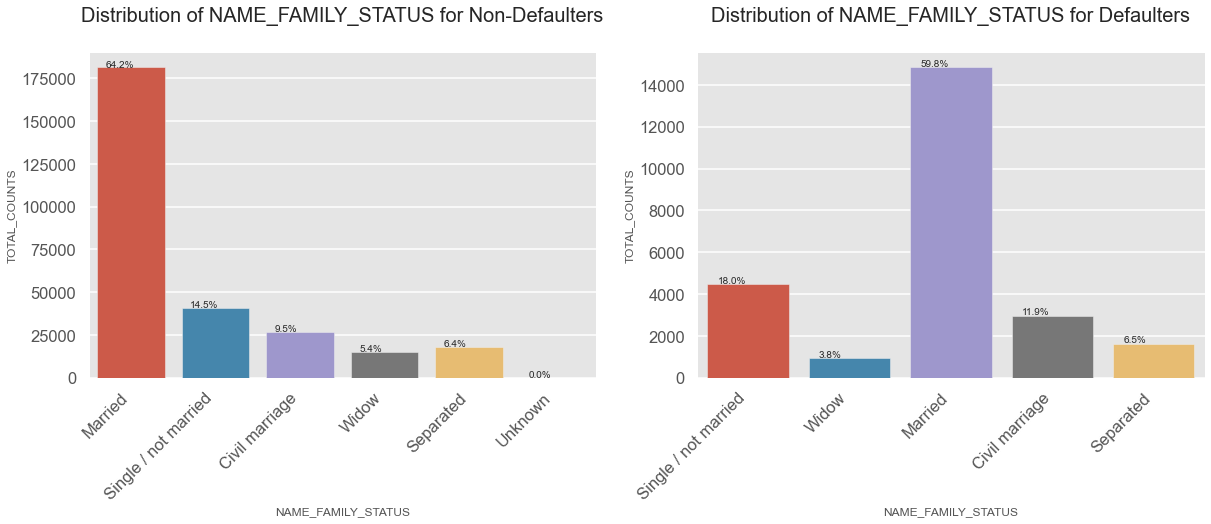

In [210]:
plotunidf_ad('NAME_FAMILY_STATUS')

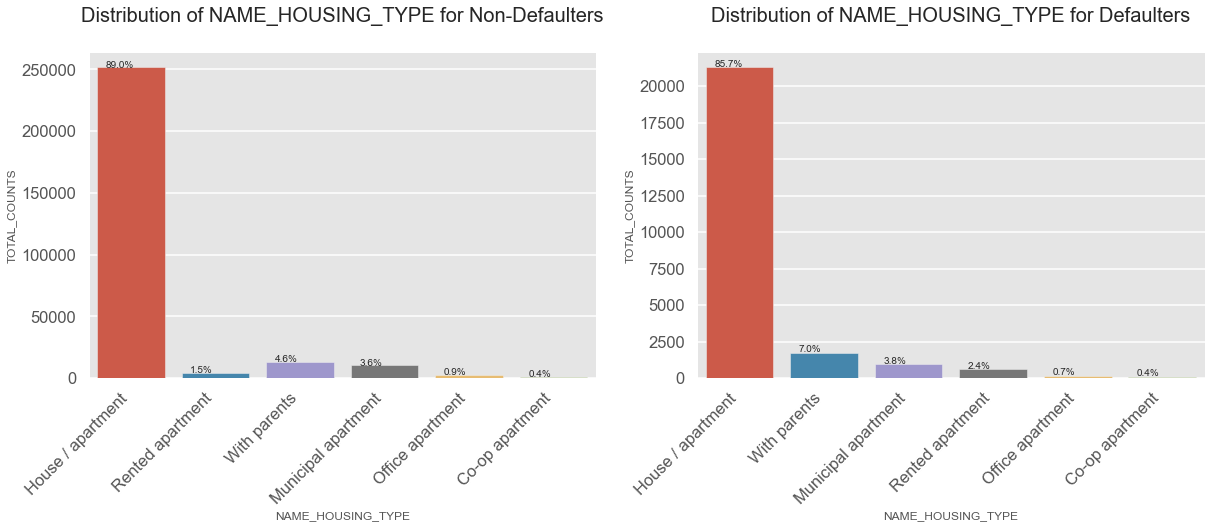

In [211]:
plotunidf_ad('NAME_HOUSING_TYPE')

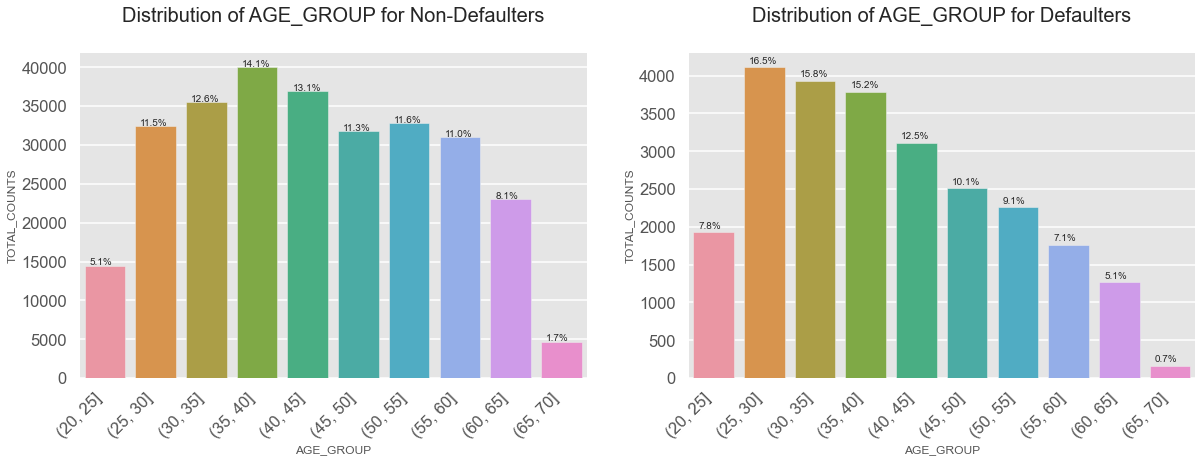

In [212]:
plotunidf_ad('AGE_GROUP')

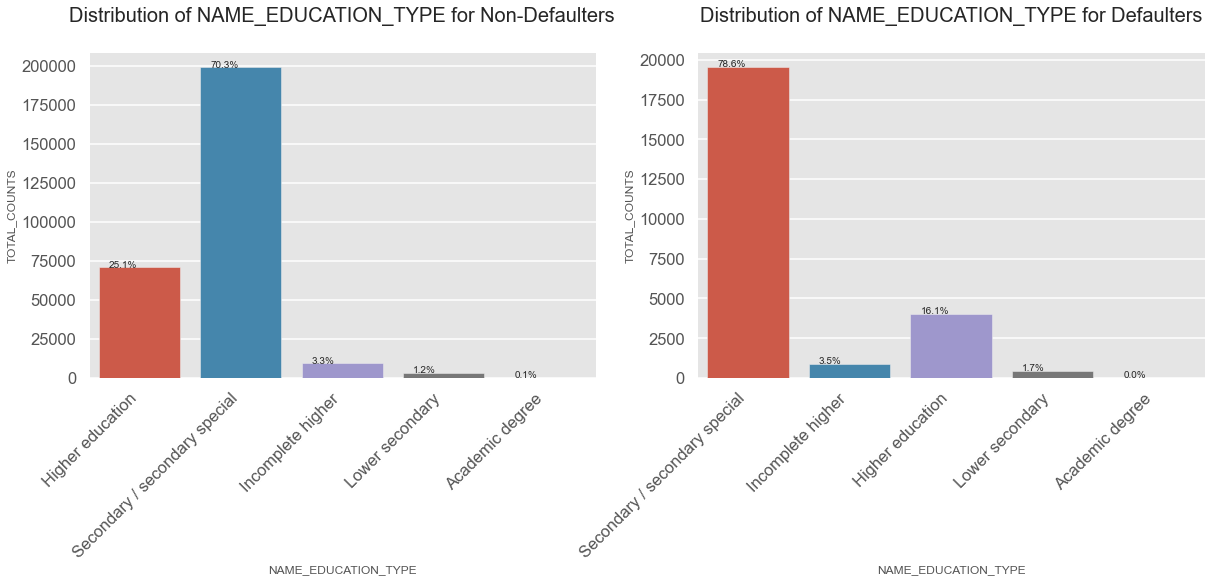

In [213]:
plotunidf_ad('NAME_EDUCATION_TYPE')

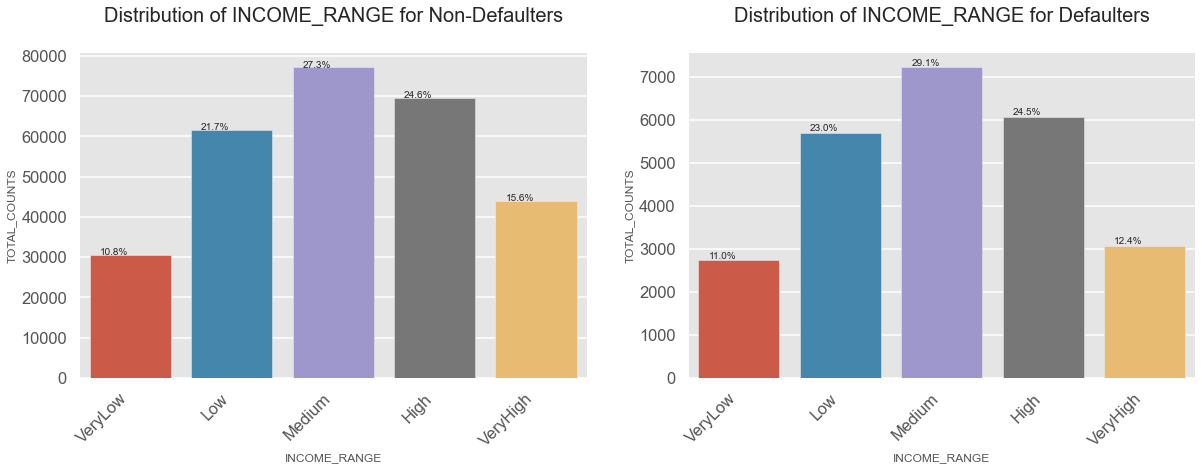

In [214]:
plotunidf_ad('INCOME_RANGE')

### Univariate continuous variable analysis

In [215]:
## Dist plot for continuous variables

def plotunidist(var):
    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2)= plt.subplots(1,2,figsize= (20,10))
    
    sns.distplot(a= df_ad0[var],ax= ax1,color= 'r')
    ax1.set_title(f'Distribution of {var} for Non-Defaulters', fontsize= 20)
    sns.distplot(a= df_ad1[var],ax= ax2,color= 'b')
    ax2.set_title(f'Distribution of {var} for Defaulters', fontsize= 20)
    plt.show()


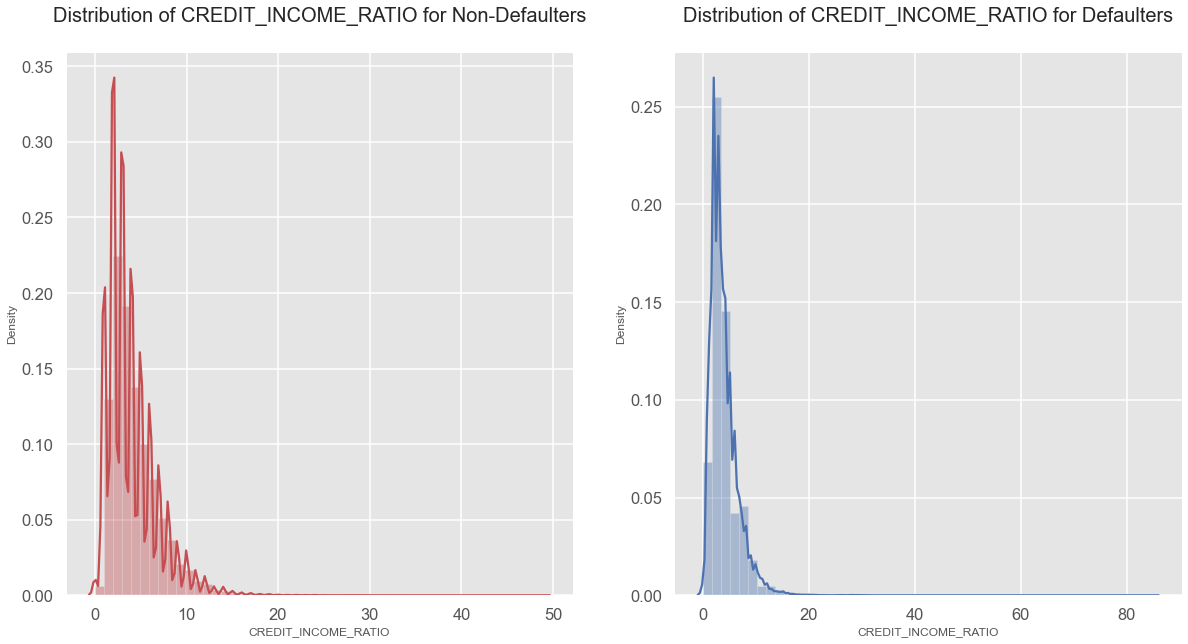

In [216]:
plotunidist('CREDIT_INCOME_RATIO')

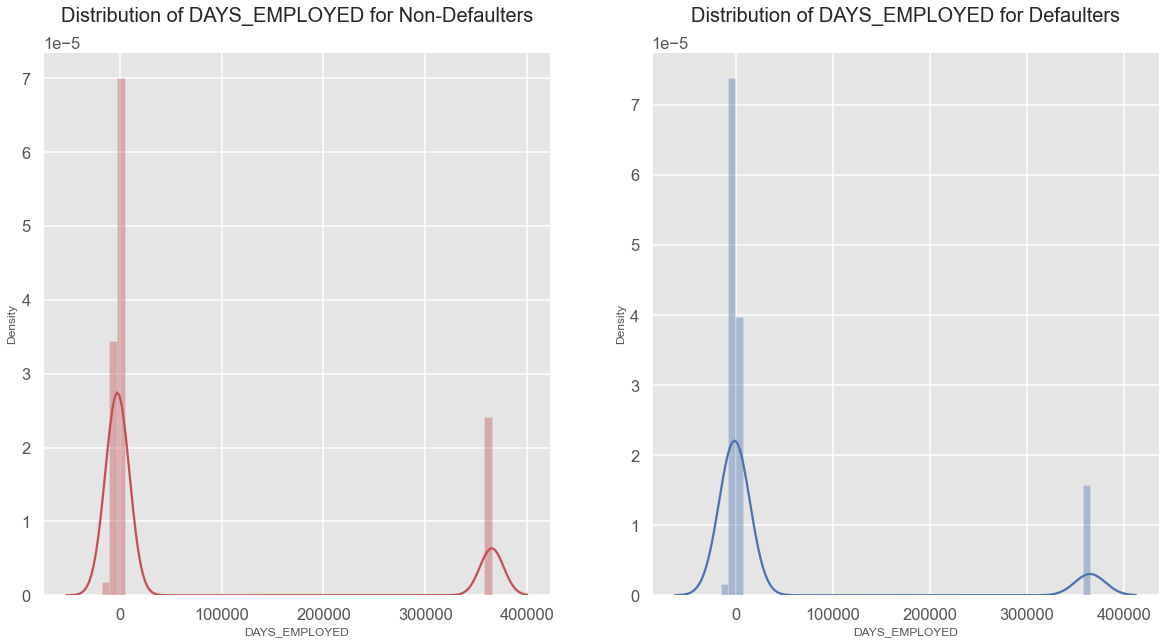

In [217]:
plotunidist('DAYS_EMPLOYED')

In [218]:
df_ad1['CNT_FAM_MEMBERS'].value_counts()

2.0     12009
1.0      5675
3.0      4608
4.0      2136
5.0       327
6.0        55
7.0         6
8.0         6
10.0        1
13.0        1
11.0        1
Name: CNT_FAM_MEMBERS, dtype: int64

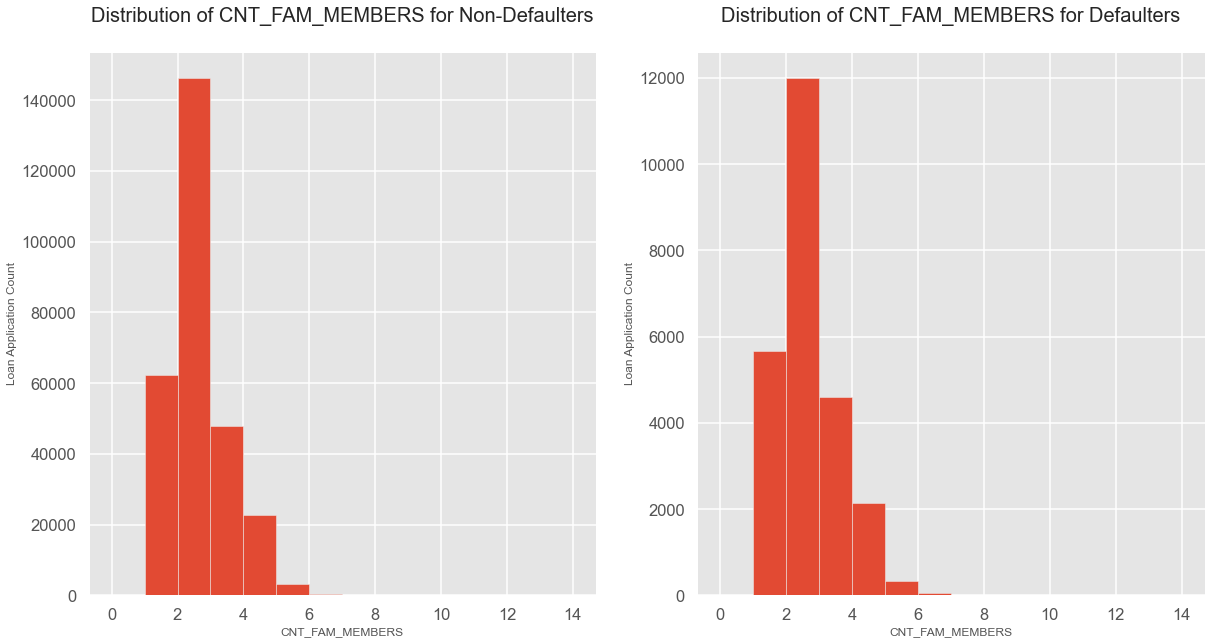

In [219]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
df_ad0['CNT_FAM_MEMBERS'].plot.hist(bins= range(15))
plt.title('Distribution of CNT_FAM_MEMBERS for Non-Defaulters', fontsize= 20)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('Loan Application Count')
plt.subplot(1,2,2)
df_ad1['CNT_FAM_MEMBERS'].plot.hist(bins= range(15))
plt.title('Distribution of CNT_FAM_MEMBERS for Defaulters', fontsize= 20)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('Loan Application Count')
plt.show()

### Calculating the Correlation for necessary columns

In [220]:
## Correlation calculation for df_ad0


Correlation = df_ad0.corr()
Correlation_df_ad= Correlation.where(np.triu(np.ones(Correlation.shape),k= 1).astype(np.bool)).unstack().reset_index()
Correlation_df_ad.columns= ['COLUMN1','COLUMN2','CORRELATION']
Correlation_df_ad.dropna(subset= ['CORRELATION'], inplace= True)
Correlation_df_ad['Abs_CORRELATION'] = Correlation_df_ad['CORRELATION'].abs()
Correlation_df_ad= Correlation_df_ad.sort_values(by= ['Abs_CORRELATION'], ascending= False)
Correlation_df_ad.head(20)

,COLUMN1,COLUMN2,CORRELATION,Abs_CORRELATION
141,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.950149,0.950149
122,AMT_ANNUITY,AMT_CREDIT,0.771297,0.771297
50,CREDIT_INCOME_RATIO,AMT_CREDIT,0.648590,0.648590
123,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418948,0.418948
124,AMT_ANNUITY,CREDIT_INCOME_RATIO,0.391501,0.391501
38,AMT_INCOME_TOTAL,AMT_CREDIT,0.342799,0.342799
101,CNT_FAM_MEMBERS,DAYS_EMPLOYED,-0.237412,0.237412
51,CREDIT_INCOME_RATIO,AMT_INCOME_TOTAL,-0.225924,0.225924
77,DAYS_REGISTRATION,DAYS_EMPLOYED,-0.210187,0.210187
111,REGION_RATING_CLIENT_W_CITY,AMT_INCOME_TOTAL,-0.200466,0.200466


In [221]:
## Correlation calculation for df_ad1

Correlation= df_ad1.corr()
Correlation_df_ad= Correlation.where(np.triu(np.ones(Correlation.shape),k= 1).astype(np.bool)).unstack().reset_index()
Correlation_df_ad.columns= ['COLUMN1','COLUMN2','CORRELATION']
Correlation_df_ad.dropna(subset= ['CORRELATION'], inplace= True)
Correlation_df_ad['Abs_CORRELATION'] = Correlation_df_ad['CORRELATION'].abs()
Correlation_df_ad= Correlation_df_ad.sort_values(by= ['Abs_CORRELATION'], ascending= False)
Correlation_df_ad.head(20)

,COLUMN1,COLUMN2,CORRELATION,Abs_CORRELATION
141,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.956637,0.956637
122,AMT_ANNUITY,AMT_CREDIT,0.752195,0.752195
50,CREDIT_INCOME_RATIO,AMT_CREDIT,0.639744,0.639744
124,AMT_ANNUITY,CREDIT_INCOME_RATIO,0.381298,0.381298
77,DAYS_REGISTRATION,DAYS_EMPLOYED,-0.188929,0.188929
101,CNT_FAM_MEMBERS,DAYS_EMPLOYED,-0.186561,0.186561
102,CNT_FAM_MEMBERS,DAYS_REGISTRATION,0.145828,0.145828
64,DAYS_EMPLOYED,CREDIT_INCOME_RATIO,0.119095,0.119095
138,REGION_RATING_CLIENT,DAYS_REGISTRATION,0.103855,0.103855
114,REGION_RATING_CLIENT_W_CITY,DAYS_REGISTRATION,0.100285,0.100285


## Bivariate Analysis for Numerical variables

In [222]:
### Function for scatter plot for continuous variables

def plotbivar(var1,var2):
    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2)= plt.subplots(1,2, figsize= (15,5))
    sns.scatterplot( x= var1, y= var2, data= df_ad0, ax=ax1)
    ax1.set_xlabel(var1)
    ax1.set_ylabel(var2)
    ax1.set_title(f'{var1} vs {var2} for Non-Defaulters', fontsize= 15)
    sns.scatterplot(x= var1, y= var2, data= df_ad1, ax=ax2)
    ax2.set_xlabel(var1)
    ax2.set_ylabel(var2)
    ax2.set_title(f'{var1} vs {var2} for Defaulters', fontsize= 15)
    plt.show()              
                  

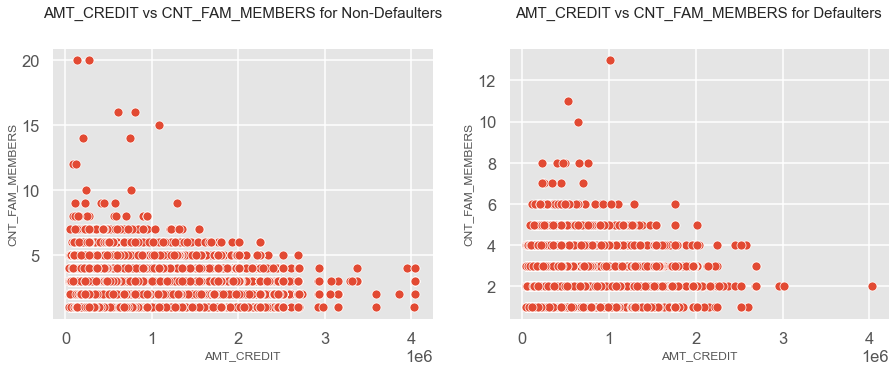

In [223]:
plotbivar('AMT_CREDIT','CNT_FAM_MEMBERS')

## Analysis of Previous Application dataset

## Cleaning the missing data

In [224]:
#Listing the columns with more than 30% of null values

col1_null= df_pa.isnull().sum()
col1_null= col1_null[col1_null.values>(0.3*len(col1_null))]
len(col1_null)

15

In [225]:
# Deleting or removing the columns with more than 30% null values

col1_null= list(col1_null[col1_null.values>=0.3].index)
df_pa.drop(labels= col1_null, axis=1, inplace= True)
print(len(col1_null))

15


### Imputation of values in columns with null values less than 30%


In [226]:
## Calculating the percentage of null values in the remaining columns

df_pa.isnull().sum()/len(df_pa)*100

SK_ID_PREV                     0.00000
SK_ID_CURR                     0.00000
NAME_CONTRACT_TYPE             0.00000
AMT_APPLICATION                0.00000
AMT_CREDIT                     0.00006
WEEKDAY_APPR_PROCESS_START     0.00000
HOUR_APPR_PROCESS_START        0.00000
FLAG_LAST_APPL_PER_CONTRACT    0.00000
NFLAG_LAST_APPL_IN_DAY         0.00000
NAME_CASH_LOAN_PURPOSE         0.00000
NAME_CONTRACT_STATUS           0.00000
DAYS_DECISION                  0.00000
NAME_PAYMENT_TYPE              0.00000
CODE_REJECT_REASON             0.00000
NAME_CLIENT_TYPE               0.00000
NAME_GOODS_CATEGORY            0.00000
NAME_PORTFOLIO                 0.00000
NAME_PRODUCT_TYPE              0.00000
CHANNEL_TYPE                   0.00000
SELLERPLACE_AREA               0.00000
NAME_SELLER_INDUSTRY           0.00000
NAME_YIELD_GROUP               0.00000
dtype: float64

In [227]:
## Checking the columns with null values less than or equal to 13%

list(df_pa.columns[(df_pa.isnull().mean()<=0.13) & (df_pa.isnull().mean()>0)])

['AMT_CREDIT']

Since most of the columns have 0 null values there is no need of imputation of values in any of these columns.
We can perform analysis directly.

## Univariate Analysis

In [228]:
## Function to plot for categorical variables

def plot1uni(var):
     
    plt.style.use('ggplot')
    sns.despine
    fig,ax= plt.subplots(1,1,figsize= (20,10))
    sns.countplot(x= var, data= df_pa, ax=ax, hue= 'NAME_CONTRACT_STATUS')
    ax.set_ylabel('Total_Counts')
    ax.set_title(f'Distribution of {var}', fontsize= 20)
    ax.set_xticklabels(ax.get_xticklabels(), rotation= 40, ha= "right")
    plt.show()
    

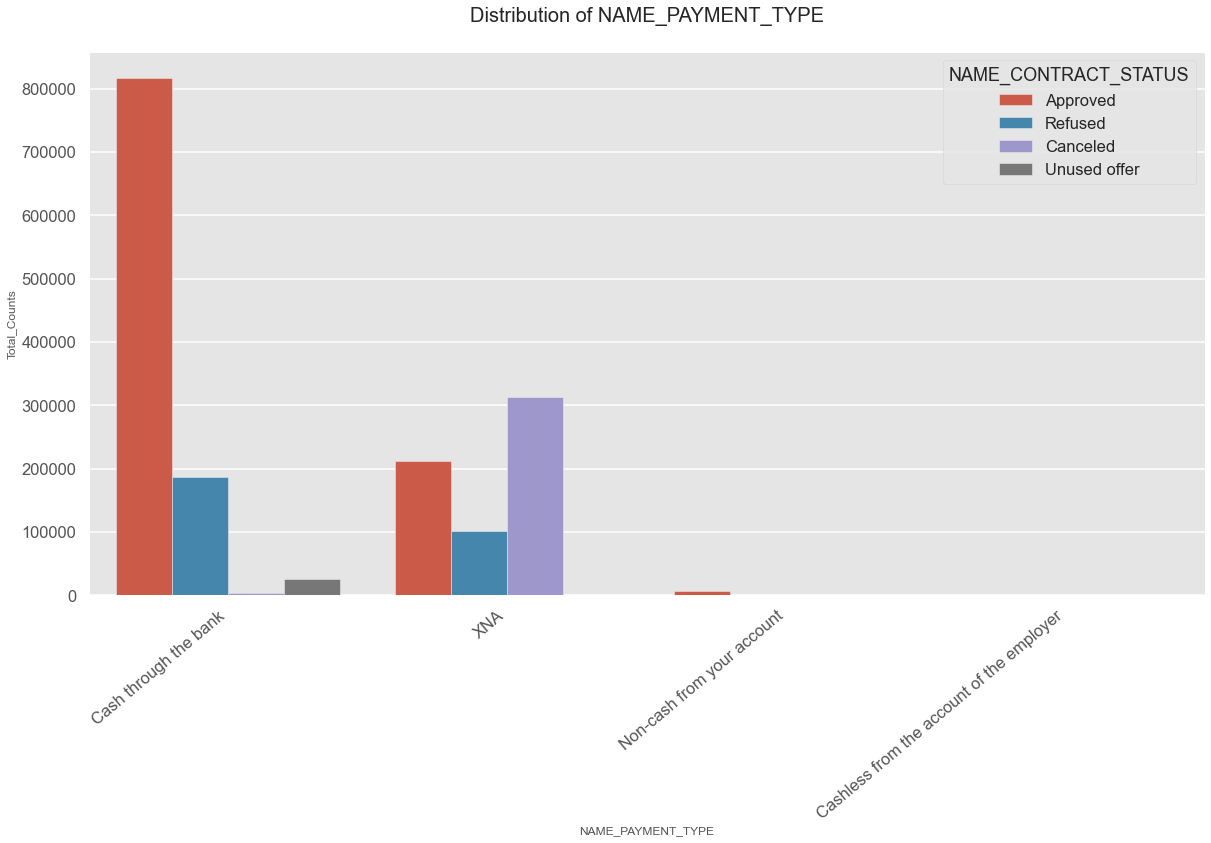

In [229]:
plot1uni('NAME_PAYMENT_TYPE')

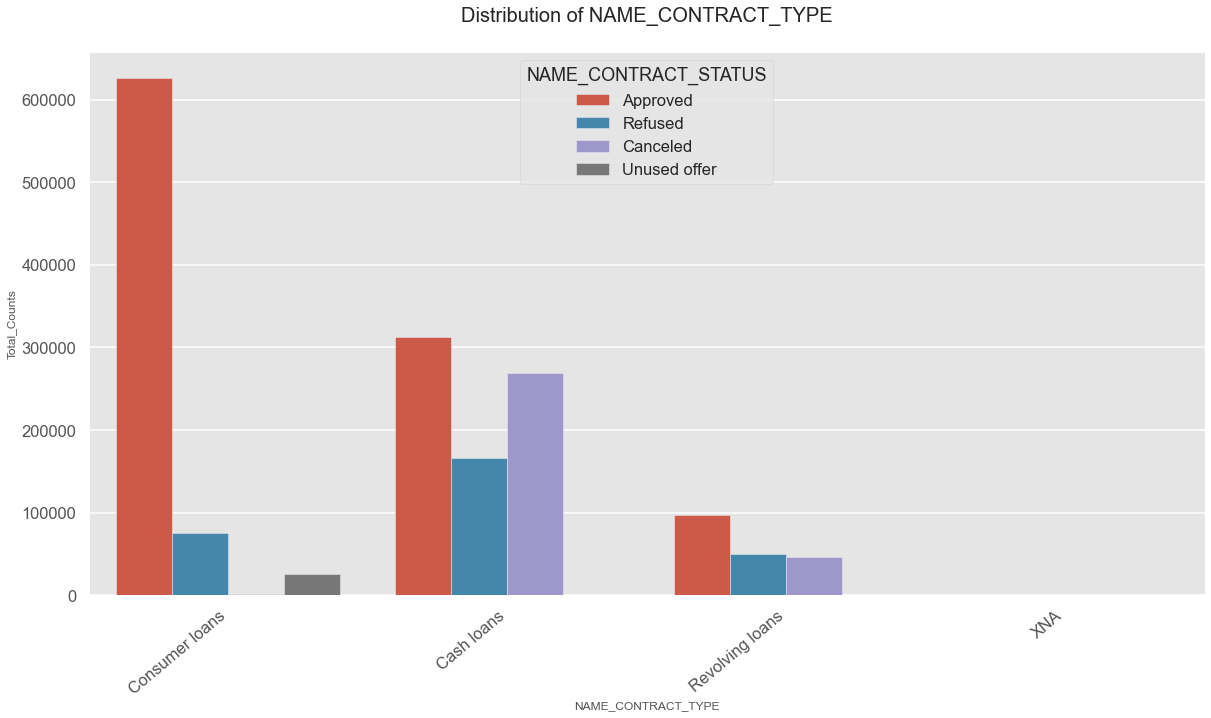

In [230]:
plot1uni('NAME_CONTRACT_TYPE')

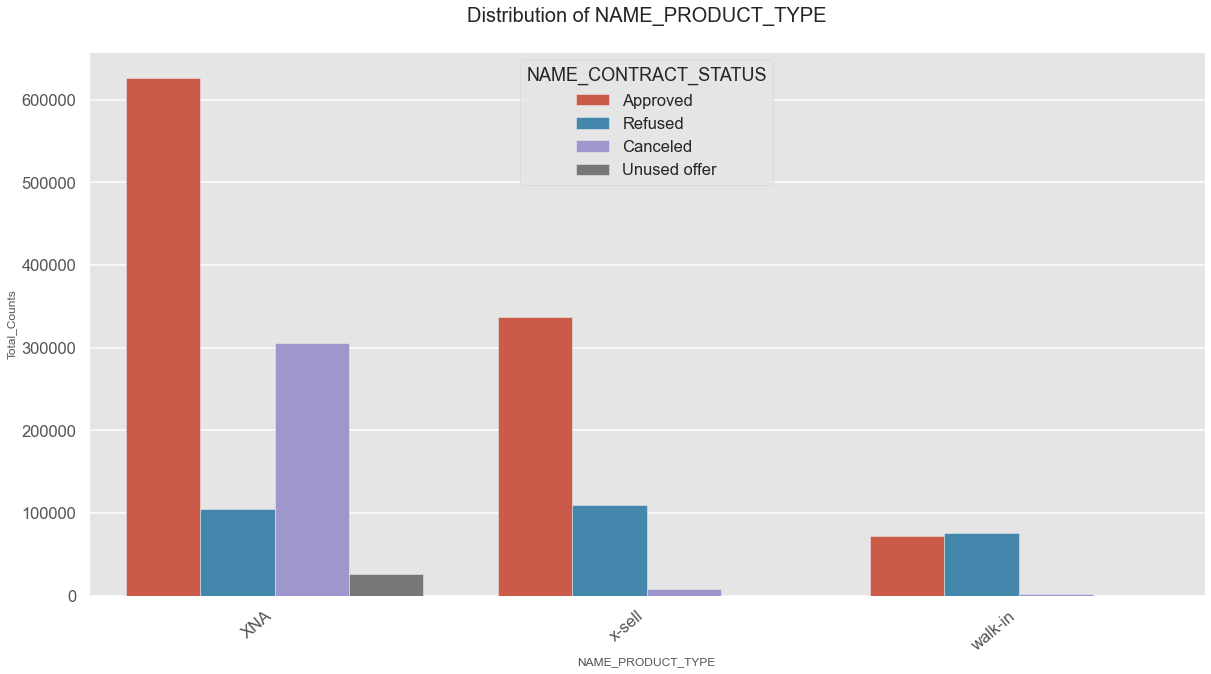

In [231]:
plot1uni('NAME_PRODUCT_TYPE')

Conclusions from the above plot:
    Most of the preferable mode for customers is sell product type.

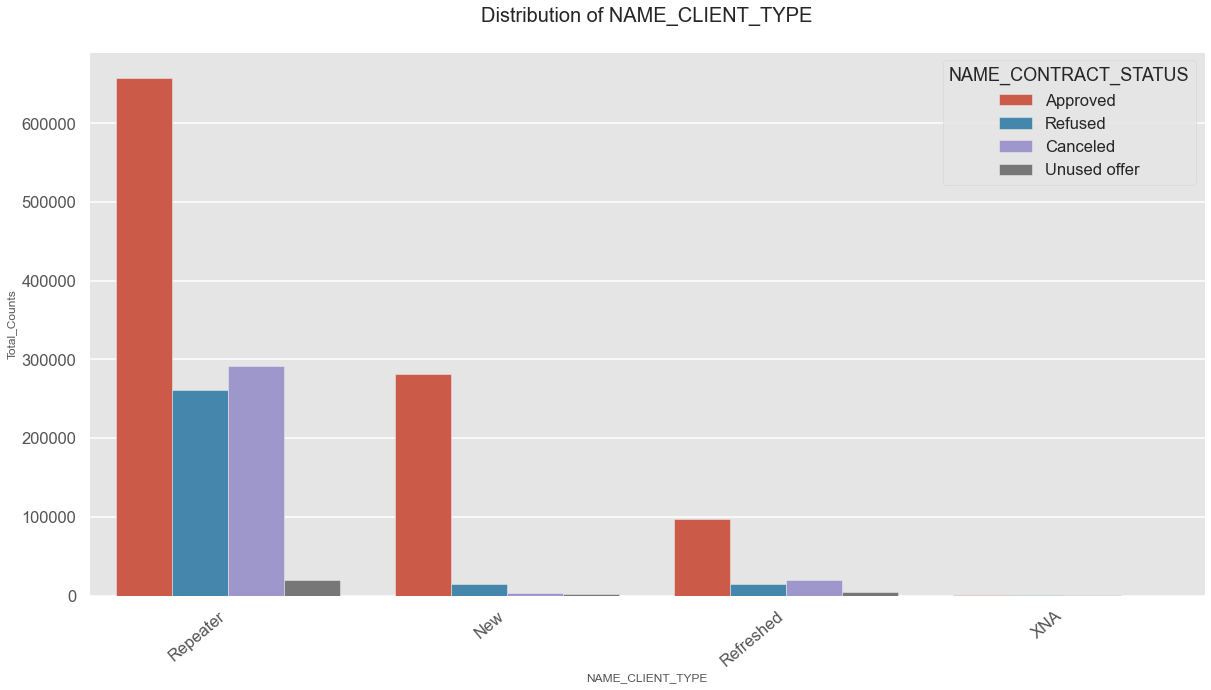

In [232]:
plot1uni('NAME_CLIENT_TYPE')

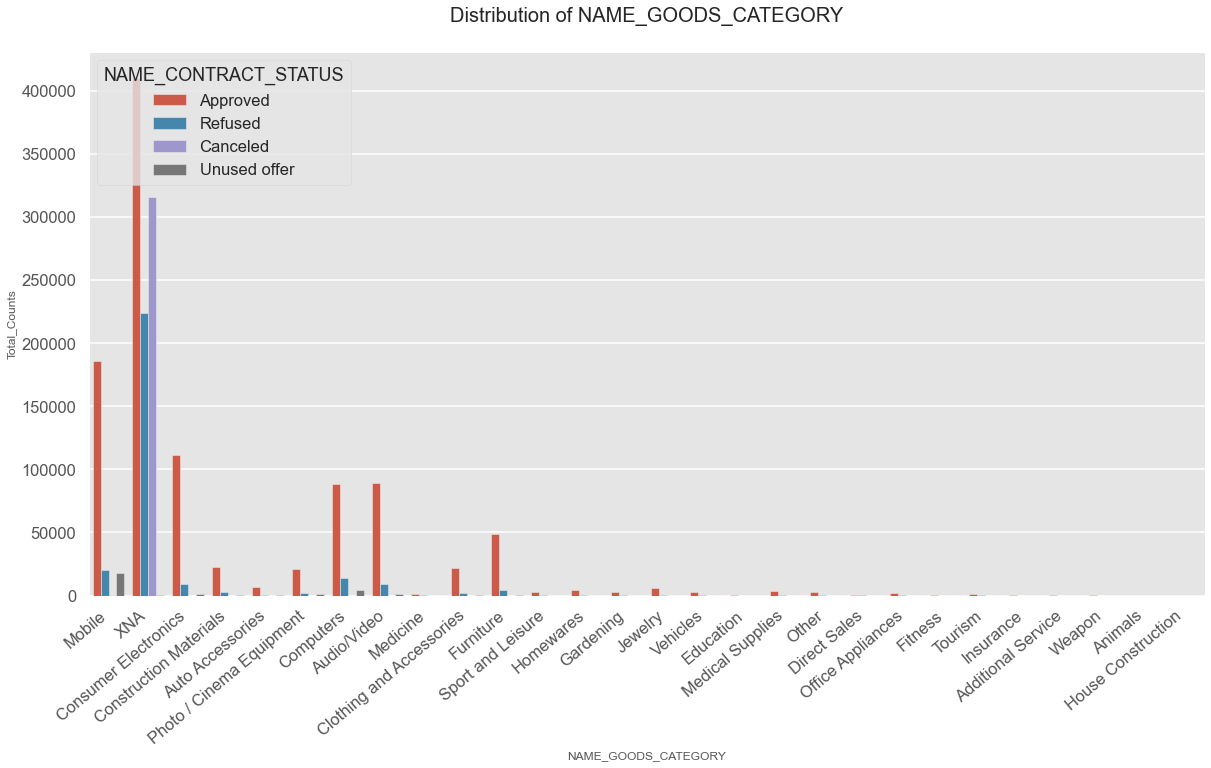

In [233]:
plot1uni('NAME_GOODS_CATEGORY')

### Calculating the correlation for necessary columns in Previous Application dataset.

In [234]:
Correlation1= df_pa.corr()
Correlation1_df_pa= Correlation1.where(np.triu(np.ones(Correlation1.shape), k= 1).astype(np.bool)).unstack().reset_index()
Correlation1_df_pa.columns= ['COLUMNP1','COLUMNP2','CORRELATION1']
Correlation1_df_pa.dropna(subset=['CORRELATION1'], inplace=True)
Correlation1_df_pa['Abs_CORRELATION1']= Correlation1_df_pa['CORRELATION1'].abs()
Correlation1_df_pa= Correlation1_df_pa.sort_values(by=['Abs_CORRELATION1'], ascending= False)
Correlation1_df_pa.head(20)

,COLUMNP1,COLUMNP2,CORRELATION1,Abs_CORRELATION1
26,AMT_CREDIT,AMT_APPLICATION,0.975824,0.975824
51,DAYS_DECISION,AMT_CREDIT,0.133763,0.133763
50,DAYS_DECISION,AMT_APPLICATION,0.133660,0.133660
52,DAYS_DECISION,HOUR_APPR_PROCESS_START,-0.039962,0.039962
43,NFLAG_LAST_APPL_IN_DAY,AMT_CREDIT,-0.025179,0.025179
35,HOUR_APPR_PROCESS_START,AMT_CREDIT,-0.021039,0.021039
48,DAYS_DECISION,SK_ID_PREV,0.019100,0.019100
62,SELLERPLACE_AREA,DAYS_DECISION,-0.018382,0.018382
53,DAYS_DECISION,NFLAG_LAST_APPL_IN_DAY,0.016555,0.016555
60,SELLERPLACE_AREA,HOUR_APPR_PROCESS_START,0.015671,0.015671


### Bivariate analysis using pair plots(Numerical Columns)

<Figure size 1080x360 with 0 Axes>

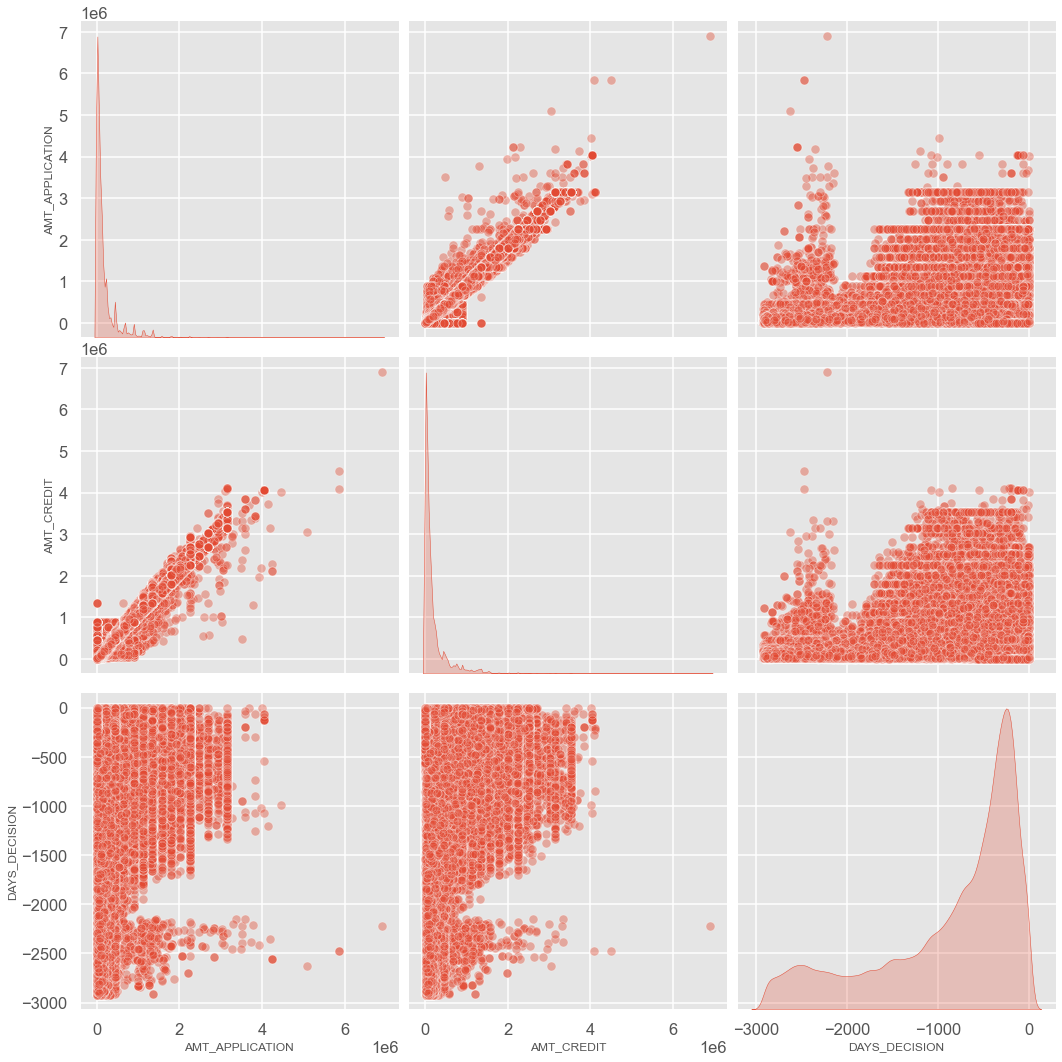

In [235]:
plt.figure(figsize= [15,5])
sns.pairplot(df_pa[['AMT_APPLICATION','AMT_CREDIT','NAME_CONTRACT_STATUS','DAYS_DECISION']],
            diag_kind= 'kde',
            plot_kws= {'alpha': 0.4, 's': 80},
            size= 5)
plt.show()

### Bivariate analysis using boxplots(Categorical vs Numerical)

In [236]:
def plot_cn(cat, num):
    plt.style.use('ggplot')
    sns.despine
    fig,ax= plt.subplots(1,1, figsize= (10,7))
    sns.boxplot(x= cat, y= num, data= df_pa)
    ax.set_ylabel(f'{num}')
    ax.set_xlabel(f'{cat}')
    ax.set_title(f'{cat} vs {num}', fontsize= 15)
    ax.set_xticklabels(ax.get_xticklabels(),rotation= 45, ha= "right")
    plt.show()

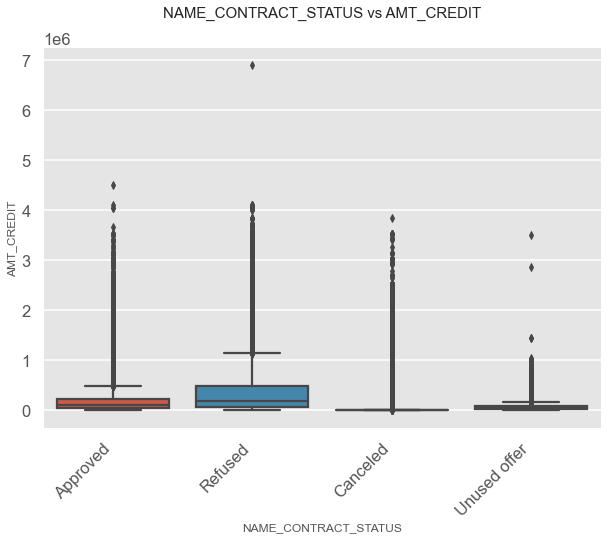

In [237]:
plot_cn('NAME_CONTRACT_STATUS', 'AMT_CREDIT')

In [238]:
## Remove the column values of 'XNA' and 'XAP'

df_pa= df_pa.drop(df_pa[df_pa['NAME_CASH_LOAN_PURPOSE']== 'XNA'].index)
df_pa= df_pa.drop(df_pa[df_pa['NAME_CASH_LOAN_PURPOSE']== 'XAP'].index)

## Merging Application Dataset with Previous Application Dataset.

In [239]:
df_ad_pa= pd.merge(left= df_ad, right= df_pa, how= 'inner', on= 'SK_ID_CURR', suffixes= '_x')
df_ad_pa

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,...,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59408,456236,0,Cash loans,M,Y,Y,0,585000.0,1575000.0,43443.0,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
59409,456244,0,Cash loans,F,N,Y,0,261000.0,1303812.0,35982.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
59410,456245,0,Cash loans,F,N,Y,3,81000.0,269550.0,11871.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Country-wide,21,Connectivity,high
59411,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high


### Univariate analysis of the combined dataset.

In [240]:
def plot_com(varx, vary):
    plt.style.use('ggplot')
    sns.despine
    ComData= df_ad_pa.pivot_table(values= 'SK_ID_CURR',
                                 index= varx,
                                 columns= vary,
                                 aggfunc= 'count')
    ComData= ComData.div(ComData.sum(axis= 1), axis= 'rows')*100
    sns.set()
    ComData.plot(kind= 'bar', stacked= True, figsize= (10,8))
    plt.title(f'Effect of {varx} on loan approval')
    plt.xlabel(f'{varx}')
    plt.ylabel(f'{vary}%')
    plt.show()

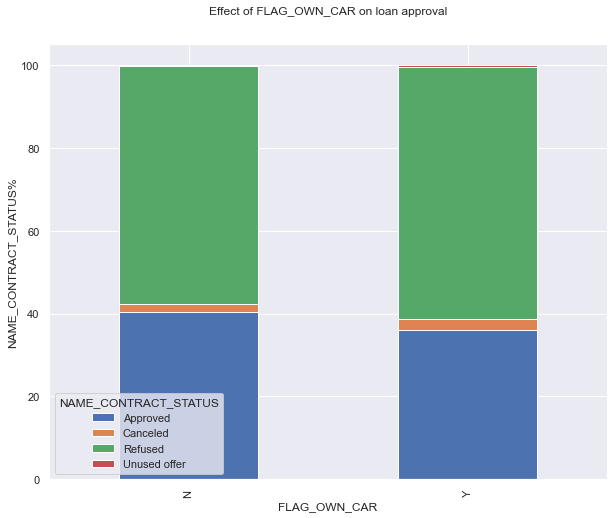

In [241]:
plot_com('FLAG_OWN_CAR','NAME_CONTRACT_STATUS')

Its clear from the above plot that there is no effect of car ownership on Approval or Rejection of loan.
Earlier, we saw that the people who owned the car have less chances of defaulting so the bank can take weightage of this in considering the Approval of loan.

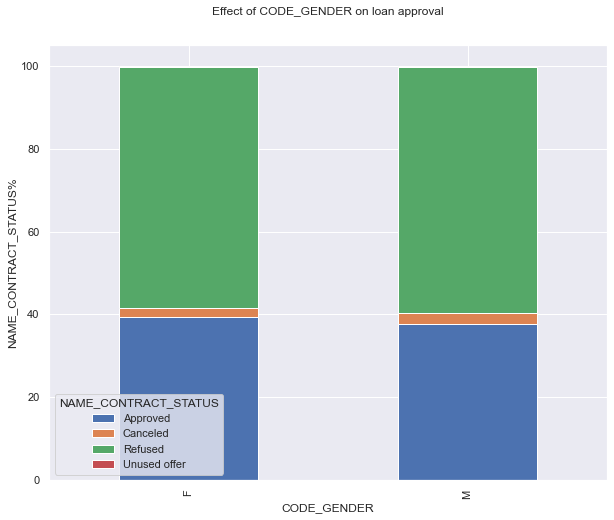

In [242]:
plot_com('CODE_GENDER','NAME_CONTRACT_STATUS')

Its clear from the above plots that gender doesn't have any impact on approval or rejection of loan.
Earlier we plotted and inferred that females have lesser chances of default than males, so the bank can consider this data and give more weightage to women on loan Approval. 

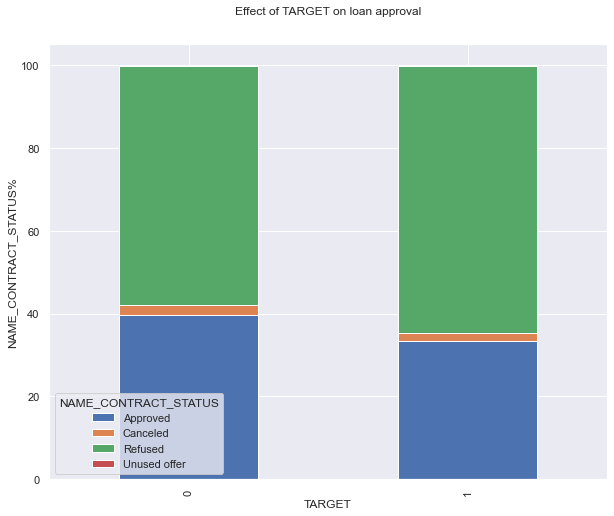

In [243]:
plot_com('TARGET','NAME_CONTRACT_STATUS')

Its clear from the above plot that the people who were approved for loan earlier have less chances of Defaulting or they are non-defaulters(TARGET=0)
People who were rejected for a loan earlier have more chances of defaulting(target=1),defaulters.
The bank should give their weightage to the non-defaulters who were given a loan earlier.

### Distribution of contract status with purposes

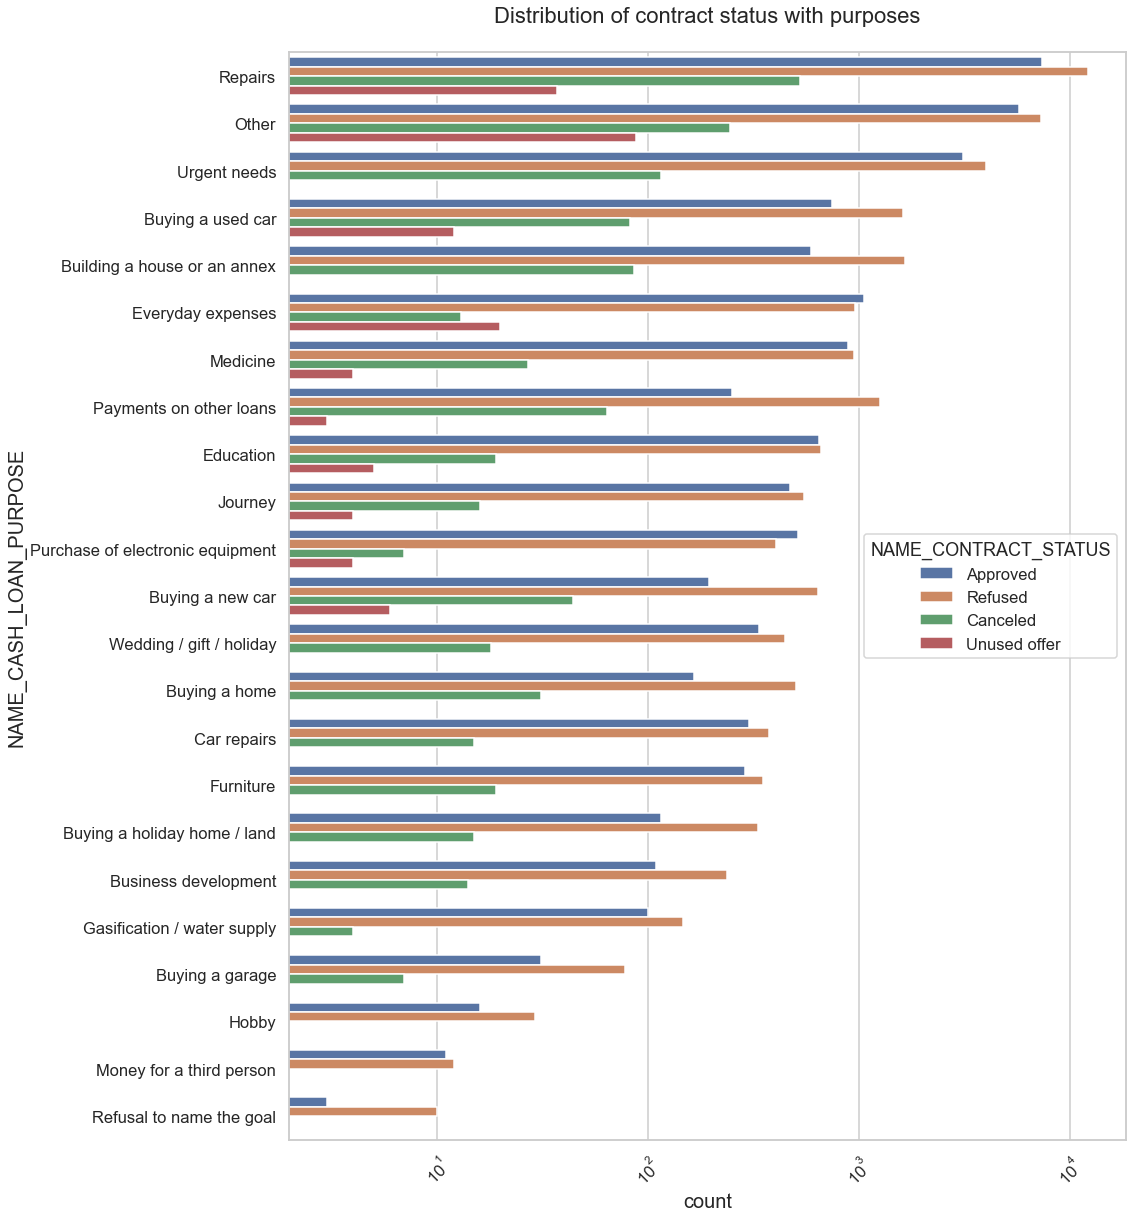

In [244]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize= (15,20))
plt.rcParams["axes.labelsize"]= 20
plt.rcParams["axes.titlesize"]= 22
plt.rcParams["axes.titlepad"]= 30
plt.xticks(rotation= 45)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax= sns.countplot(data= df_ad_pa, y= 'NAME_CASH_LOAN_PURPOSE',
                 order= df_ad_pa['NAME_CASH_LOAN_PURPOSE'].value_counts().index, hue= 'NAME_CONTRACT_STATUS')

### Distribution of Purposes with Target


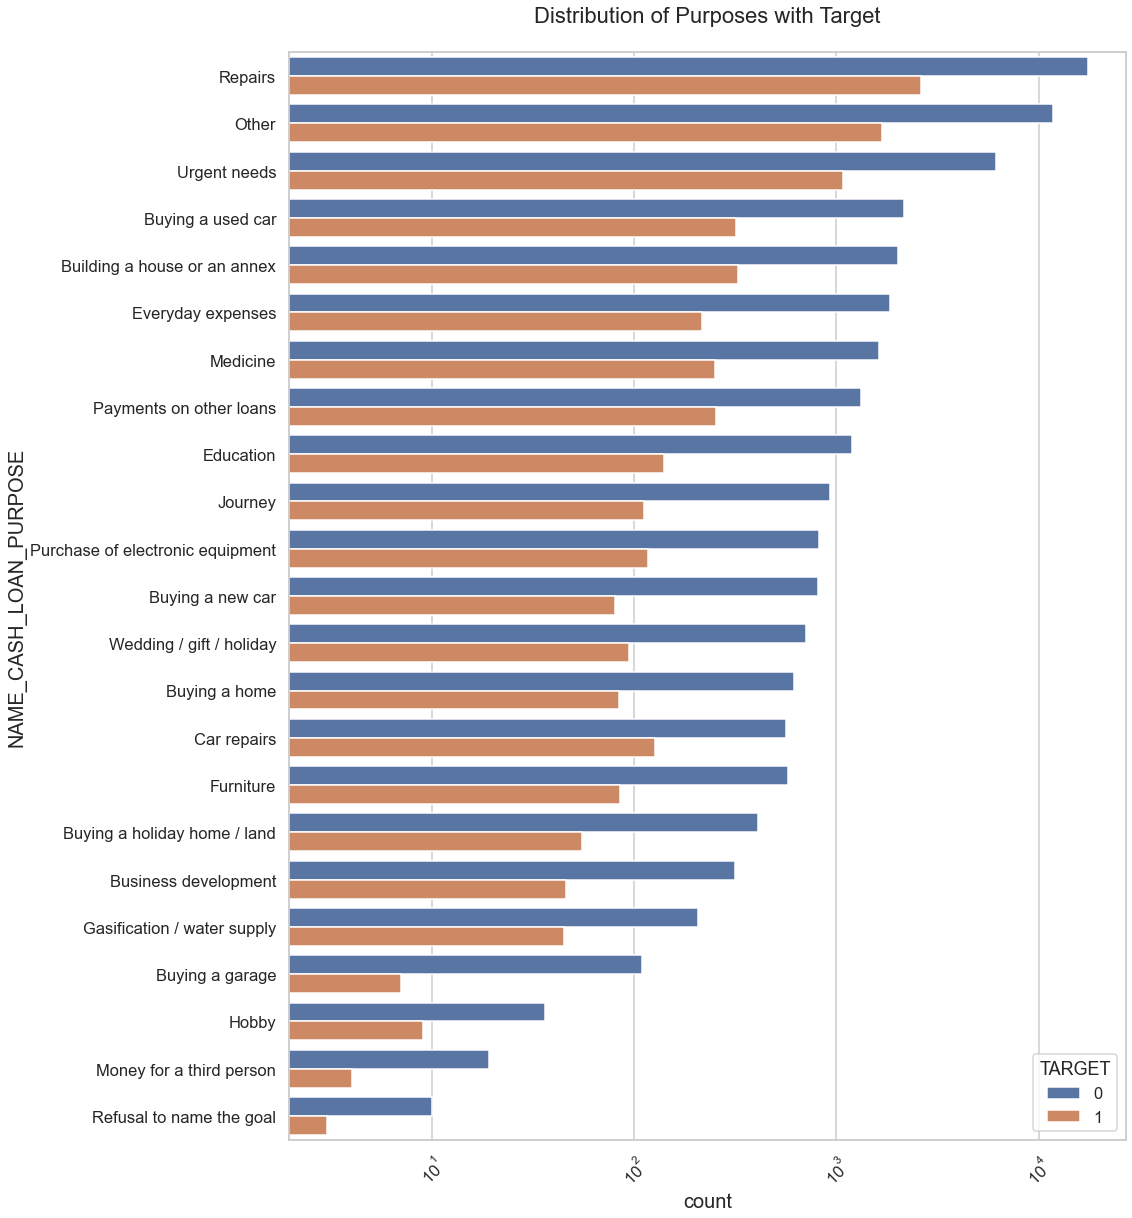

In [245]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,20))
plt.rcParams["axes.labelsize"]= 20
plt.rcParams["axes.titlesize"]= 22
plt.rcParams["axes.titlepad"]= 30
plt.xticks(rotation= 45)
plt.xscale('log')
plt.title('Distribution of Purposes with Target')
ax= sns.countplot(data= df_ad_pa, y= 'NAME_CASH_LOAN_PURPOSE',
                 order= df_ad_pa['NAME_CASH_LOAN_PURPOSE'].value_counts().index, hue= 'TARGET')


## Bivariate analysis for the combined dataset

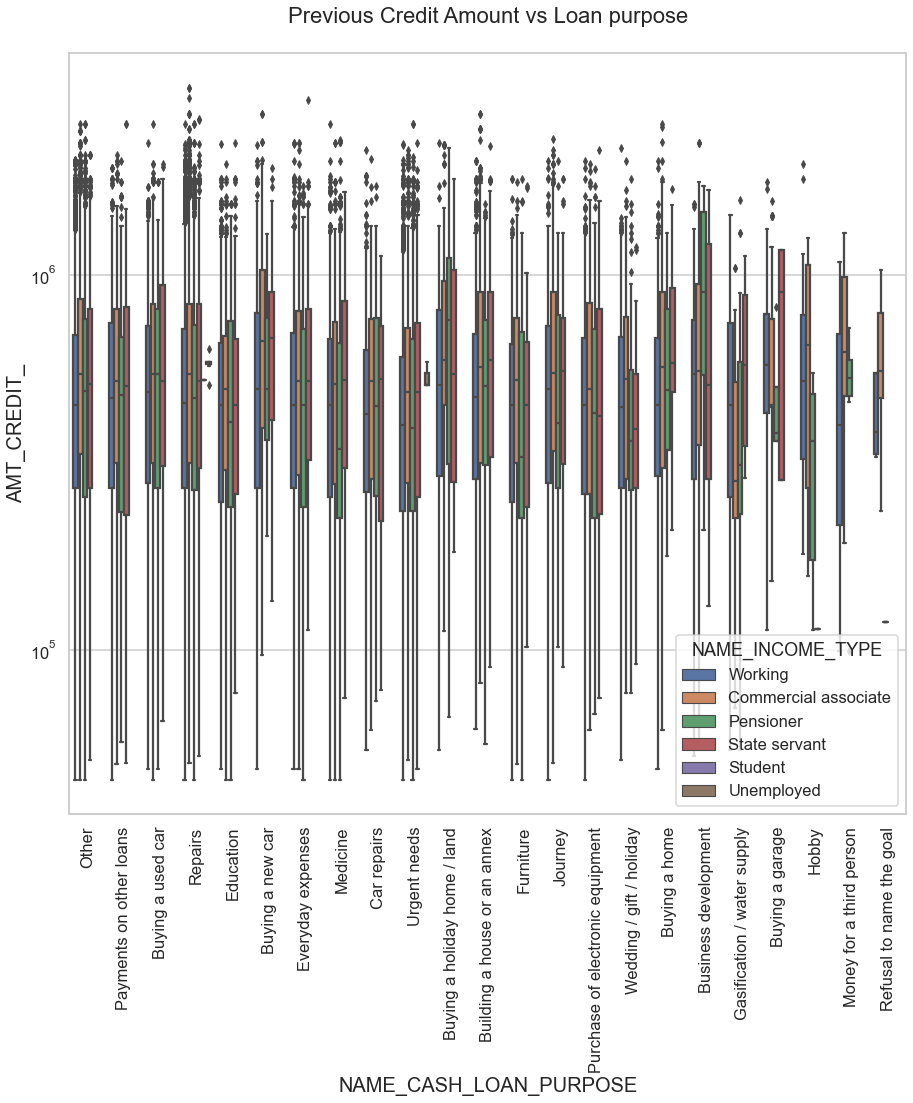

In [246]:
## Boxplot for Credit Amount

plt.figure(figsize= (15,14))
plt.xticks(rotation= 90)
plt.yscale('log')
sns.boxplot(data= df_ad_pa, x= 'NAME_CASH_LOAN_PURPOSE', hue= 'NAME_INCOME_TYPE', y= 'AMT_CREDIT_')
plt.title('Previous Credit Amount vs Loan purpose')
plt.show()

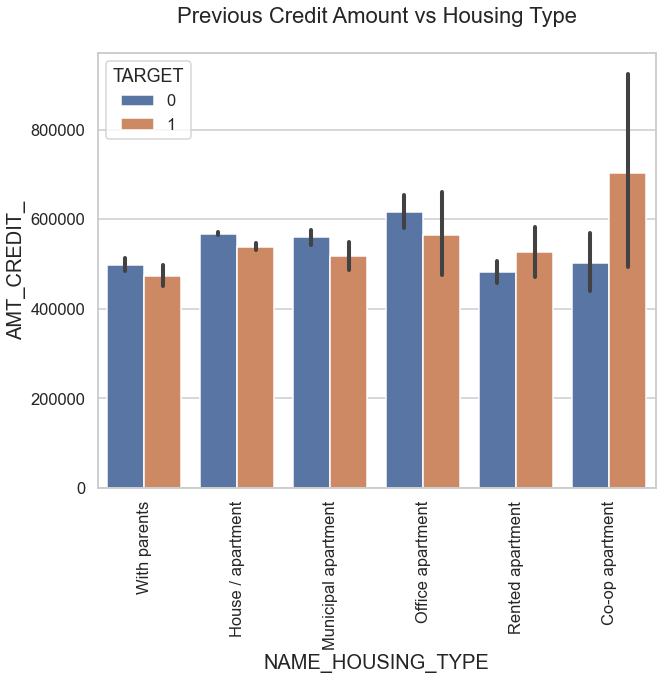

In [247]:
## Boxplot for Housing type with Previous Credit Amount

plt.figure(figsize= (10,8))
plt.xticks(rotation= 90)
sns.barplot(data= df_ad_pa, y= 'AMT_CREDIT_', hue= 'TARGET', x= 'NAME_HOUSING_TYPE')
plt.title('Previous Credit Amount vs Housing Type')
plt.show()

### FINAL CONCLUSION


